<a href="https://colab.research.google.com/github/tcfe95/flask-ann-api/blob/main/laptop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving laptop_price(1).csv to laptop_price(1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Lecture du Dataset


In [3]:
df = pd.read_csv('laptop_price(1).csv', encoding='latin1')
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Analyse exploratoire

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


<Axes: >

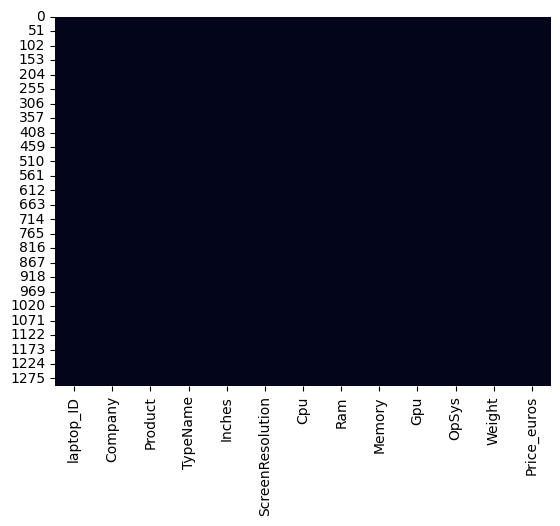

In [4]:
df.info()
df.describe()
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)


préparation des données

In [5]:
#'Price_euros' est la variable cible
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Encodage si tu as des colonnes catégorielles (CPU, GPU, etc.)
X = pd.get_dummies(X, drop_first=True)


Séparation en train/test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entraînement du modèle

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Évaluation

In [8]:
y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² :", r2_score(y_test, y_pred))


MAE : 299.61362526194074
MSE : 191297.4519081767
RMSE : 437.37564164934554
R² : 0.6233757392452894


Visualisation des performances

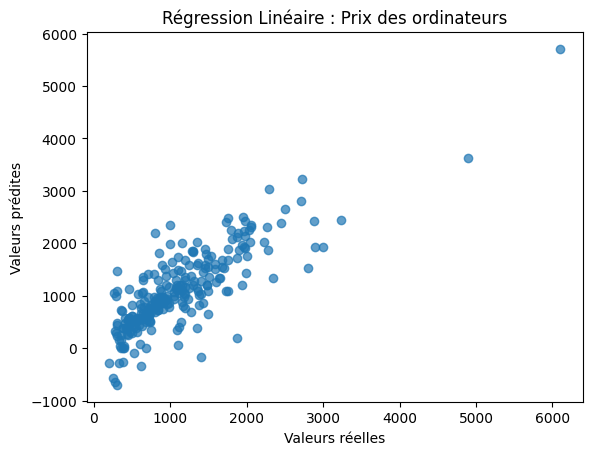

In [9]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Régression Linéaire : Prix des ordinateurs")
plt.show()


Analyse de correlation

Pour comprendre quelles variables influencent le plus le prix

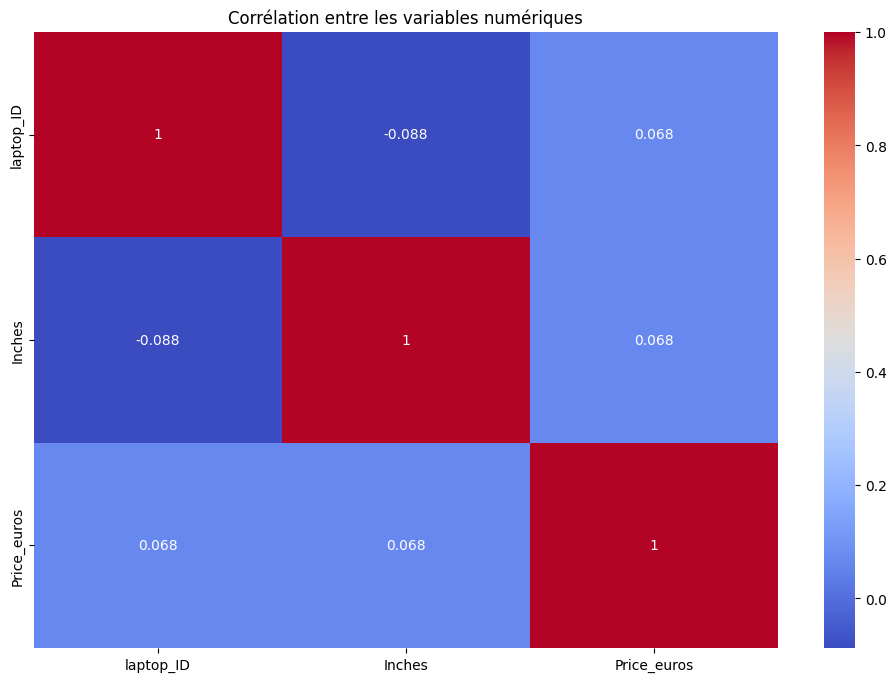

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables numériques")
plt.show()


importance des variables

Cela nous dira quelles caractéristiques (RAM, CPU, taille, etc.) influencent le plus le prix.

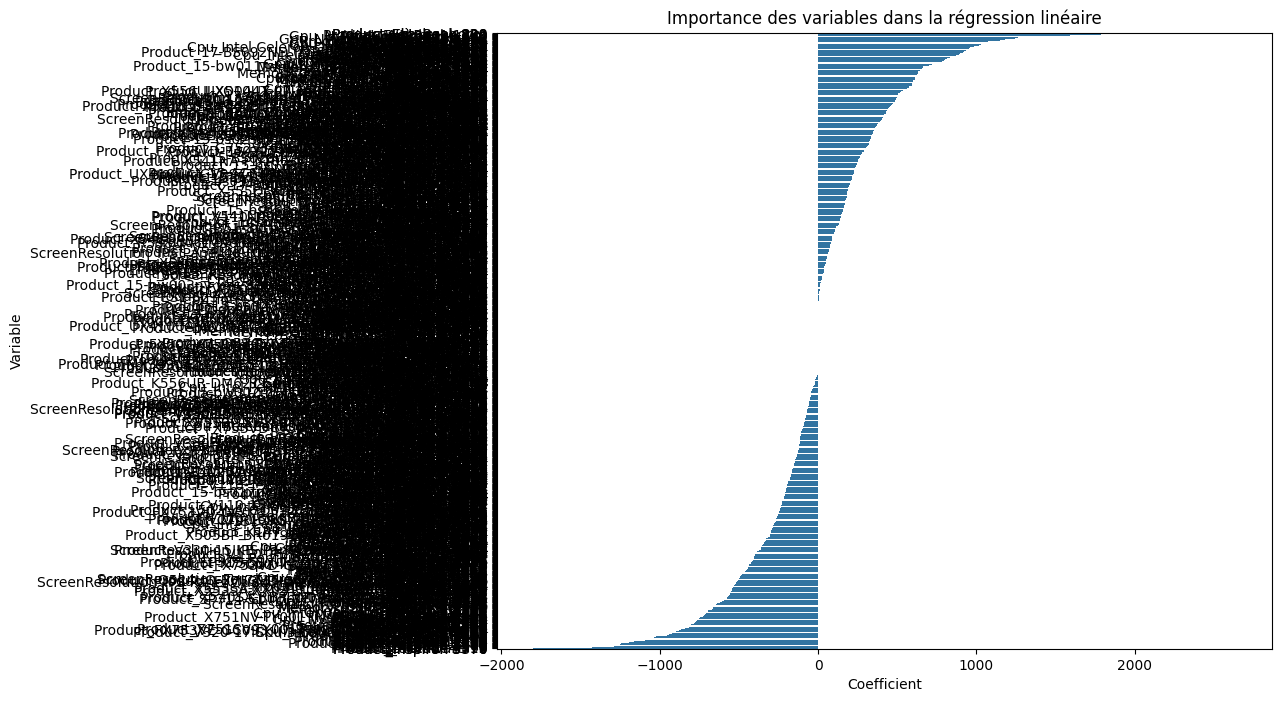

In [11]:
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Coefficient', y='Variable', data=coefficients)
plt.title("Importance des variables dans la régression linéaire")
plt.show()


Vérification des résidus

pour s'assurer que le modèle respecte les hypothèses de regression lineaire

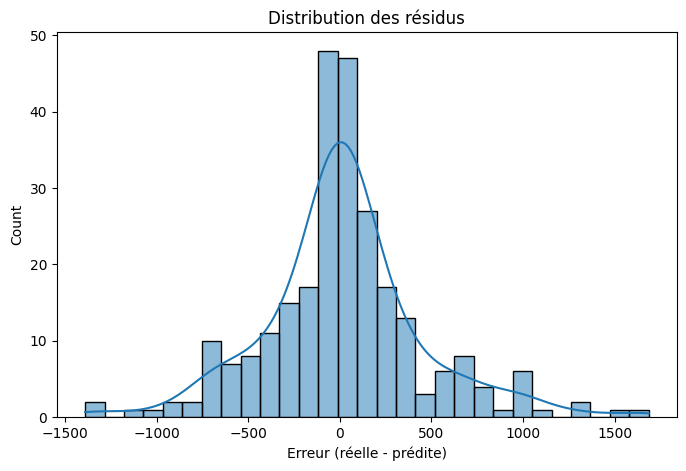

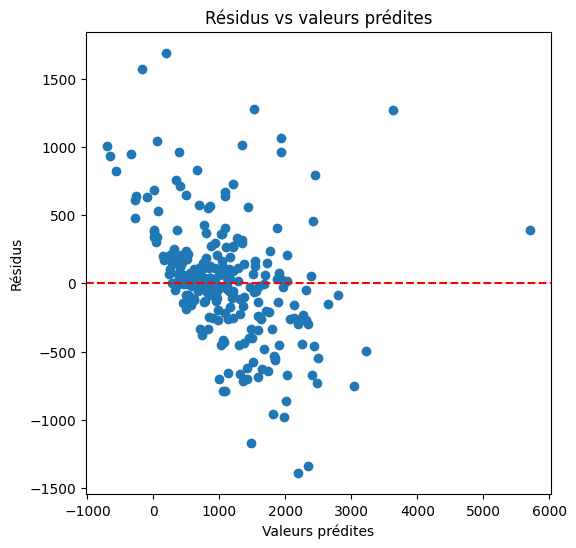

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Distribution des résidus")
plt.xlabel("Erreur (réelle - prédite)")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title("Résidus vs valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.show()


Comparaison avec d'autres modèles

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print(f"{name} R² : {r2_score(y_test, y_pred):.3f}")


Linear Regression R² : 0.623
Ridge Regression R² : 0.877
Lasso Regression R² : 0.853
Decision Tree R² : 0.675
Random Forest R² : 0.745


CONCLUSION

Le modèle de régression Ridge s’est révélé le plus performant avec un coefficient de détermination R² de 0.877, indiquant qu’il explique près de 88 % de la variabilité du prix des ordinateurs.
Les caractéristiques les plus influentes sur le prix sont probablement liées à la RAM, au processeur (CPU) et à la carte graphique (GPU), des composantes essentielles dans la détermination du coût d’un ordinateur.
En conclusion, la régularisation (Ridge, Lasso) améliore nettement la qualité du modèle par rapport à une régression linéaire classique. Pour aller plus loin, un ajustement des hyperparamètres (GridSearchCV) ou l’utilisation de modèles non linéaires avancés (XGBoost, Gradient Boosting) pourrait encore accroître la précision.


In [16]:
!pip freeze > requirements.txt

In [17]:
!ls

'laptop_price(1).csv'   requirements.txt   sample_data


In [18]:
from google.colab import files
files.download("requirements.txt")
files.download("laptop_price(1).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>